In [11]:
import zipfile
import os
import cv2
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def extract_zip(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

In [3]:
zip_file_path = '/content/animals.zip'
extract_folder = '/content/animals'

In [4]:
extract_zip(zip_file_path, extract_folder)

In [5]:
def load_images_from_folder(folder, label, num_images=100, show_images=False):
    images = []
    labels = []
    for idx, filename in enumerate(os.listdir(folder)[:num_images]):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (64, 64))
            images.append(img.flatten())
            labels.append(label)

            # Show first 5 images if requested
            if show_images and idx < 100:
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                plt.imshow(img_rgb)
                plt.title(f"{filename} (Label: {label})")
                plt.axis('off')
                plt.show()

    return images, labels

In [6]:
cat_folder = '/content/animals/animals/cats'
dog_folder = '/content/animals/animals/dogs'
panda_folder = '/content/animals/animals/panda'

In [7]:
cat_images, cat_labels = load_images_from_folder(cat_folder, 'cat')
dog_images, dog_labels = load_images_from_folder(dog_folder, 'dog')
panda_images, panda_labels = load_images_from_folder(panda_folder, 'panda')

In [8]:
images = np.array(cat_images + dog_images + panda_images)
labels = np.array(cat_labels + dog_labels + panda_labels)

In [9]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [10]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [12]:
k_values = range(1, 51)
mean_acc = []

for k in k_values:
    knn_k = KNeighborsClassifier(n_neighbors=k)

    scores = cross_val_score(knn_k, images, encoded_labels, cv=kf, scoring='accuracy', n_jobs=-1)
    mean_acc.append(scores.mean())

best_k = k_values[int(np.argmax(mean_acc))]
best_acc = max(mean_acc)
print(f"Best k: {best_k} | CV accuracy: {best_acc:.4f}")

Best k: 3 | CV accuracy: 0.4733


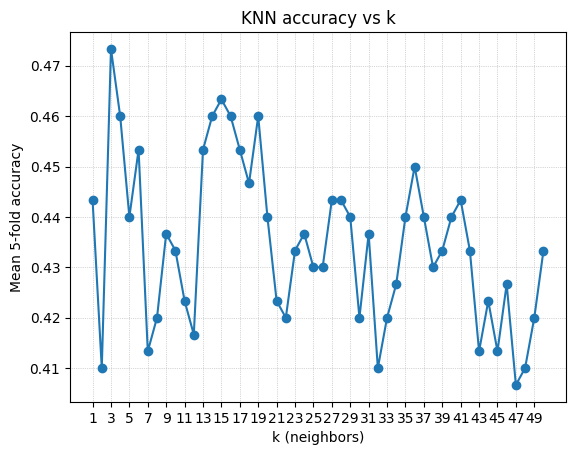

In [13]:
plt.figure()
plt.plot(list(k_values), mean_acc, marker='o')
plt.xlabel('k (neighbors)')
plt.ylabel('Mean 5-fold accuracy')
plt.title('KNN accuracy vs k')
plt.xticks(list(k_values)[::2])  # tick every 2 to keep it readable
plt.grid(True, linestyle=':', linewidth=0.5)
plt.show()

In [15]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(images, encoded_labels)

KNeighborsClassifier(n_neighbors=3)

In [17]:
chosen_k_scores = cross_val_score(best_knn, images, encoded_labels, cv=kf, scoring='accuracy', n_jobs=-1)
print("Chosen-k fold accuracies:", np.round(chosen_k_scores, 4))
print(f"Chosen-k mean accuracy: {chosen_k_scores.mean():.4f}")

Chosen-k fold accuracies: [0.5833 0.4333 0.45   0.4167 0.4833]
Chosen-k mean accuracy: 0.4733


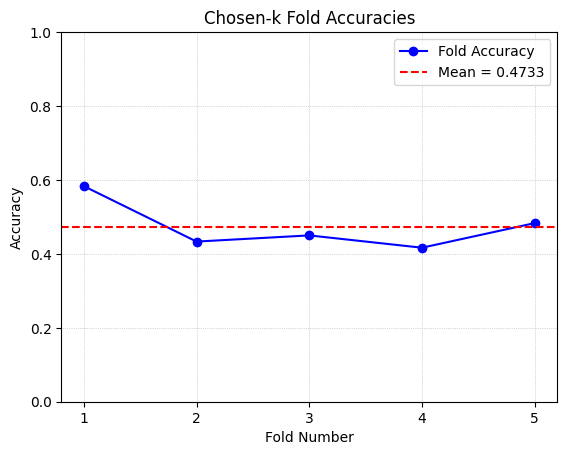

In [18]:
import matplotlib.pyplot as plt
import numpy as np

folds = [1, 2, 3, 4, 5]
cv_scores = [0.5833, 0.4333, 0.4500, 0.4167, 0.4833]
mean_score = np.mean(cv_scores)

plt.plot(folds, cv_scores, marker='o', color='blue', label='Fold Accuracy')
plt.axhline(y=mean_score, color='red', linestyle='--', label=f'Mean = {mean_score:.4f}')

plt.title('Chosen-k Fold Accuracies')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(folds)
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.5)
plt.show()
